Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X, X.shape)
print(y, y.shape)

[[0]
 [1]
 [2]
 [4]] (4, 1)
[4 1 2 5] (4,)


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)
FI

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
# Vaš kôd ovdje

print(linalg.inv(FI.transpose().dot(FI)).dot(FI.transpose()).dot(y))
print(linalg.pinv(FI).dot(y))

w = linalg.pinv(FI).dot(y)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143


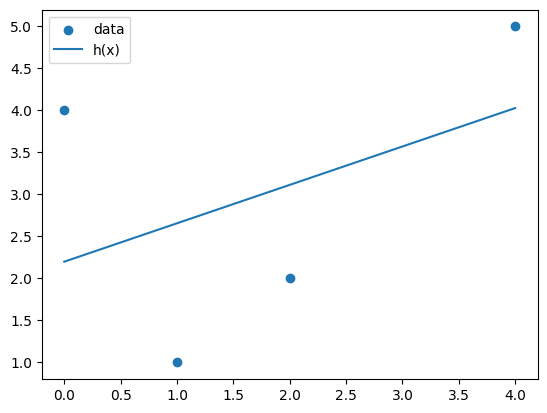

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

h_x = w.dot(FI.transpose())
print(mean_squared_error(y, h_x))

plt.scatter(X, y, label="data")
plt.plot(X, h_x, label="h(x)")
plt.legend(loc="best")
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje

print("Matrica dizajna nije kvadratna pa nema inverz :(")
#linalg.inv(FI)

Matrica dizajna nije kvadratna pa nema inverz :(


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(X,y)
print(reg.coef_)
print(reg.intercept_)

h_x_reg = reg.predict(X)
mean_squared_error(y, h_x_reg)

[0.45714286]
2.2


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return np.array([f(x) + normal(0, noise, 1) for x in X])

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

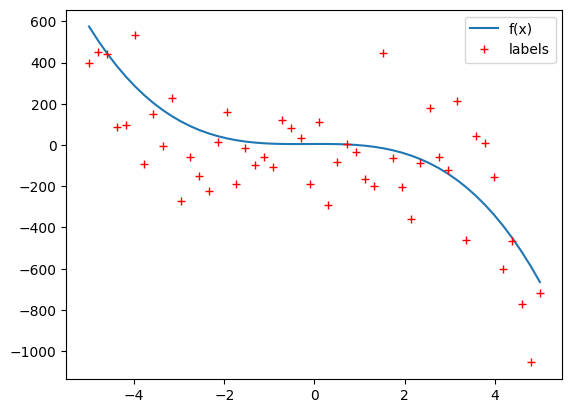

In [11]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

plt.plot(X, f(X), label='f(x)')
plt.plot(X, y, 'r+', label='labels')
plt.legend(loc="best")
plt.show()

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

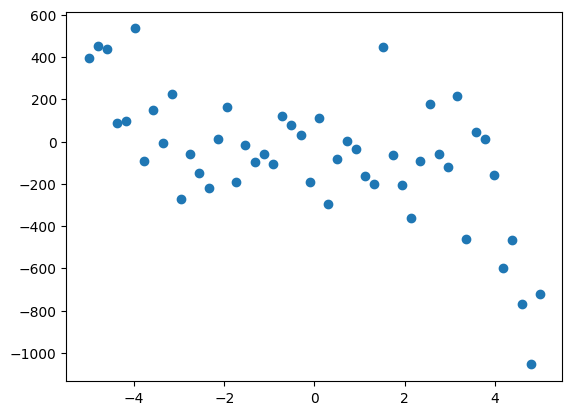

In [12]:
# Vaš kôd ovdje
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Srednja kvadratna pogreška: 35694.885348028394


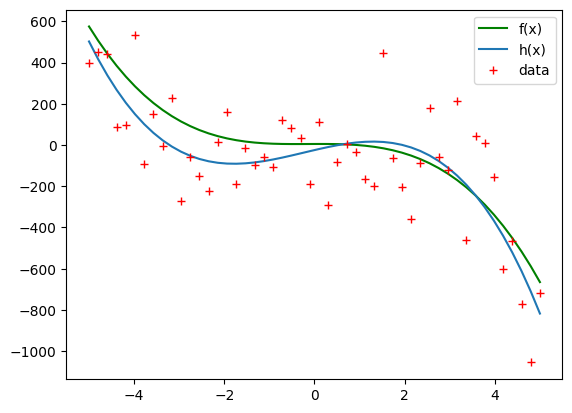

In [13]:
# Vaš kôd ovdje

poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)
w = linalg.pinv(FI).dot(y).reshape(-1)  
h_x = w.dot(FI.transpose())
print(f"Srednja kvadratna pogreška: {mean_squared_error(y, h_x)}")

plt.plot(X, f(X), 'g', label='f(x)')
plt.plot(X, h_x, label='h(x)')
plt.plot(X, y, 'r+', label='data')
plt.legend(loc="best")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Srednja kvadratna pogreška za h1(x): 58869.47893039408
Srednja kvadratna pogreška za h3(x): 35694.885348028394
Srednja kvadratna pogreška za h5(x): 33514.60493090284
Srednja kvadratna pogreška za h10(x): 29183.69983178231
Srednja kvadratna pogreška za h20(x): 24756.450957963163


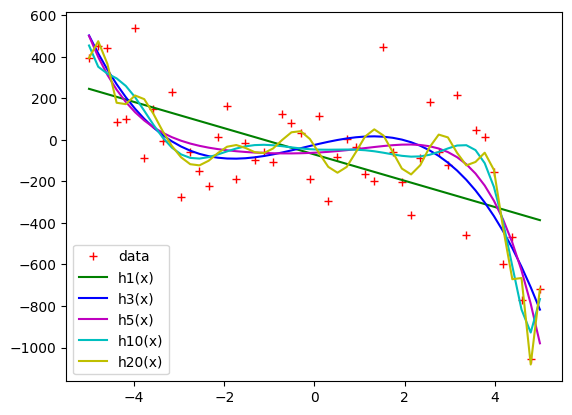

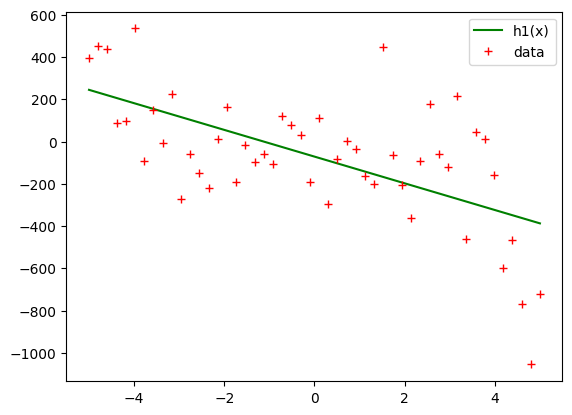

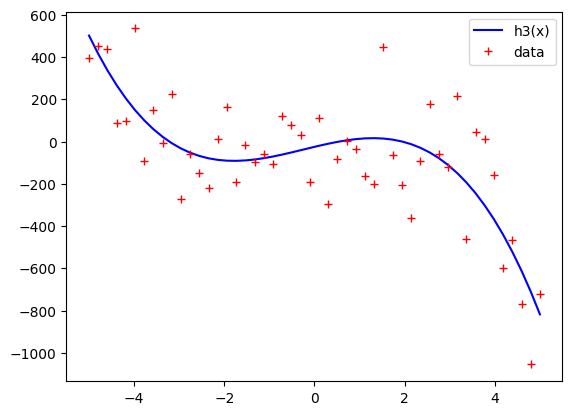

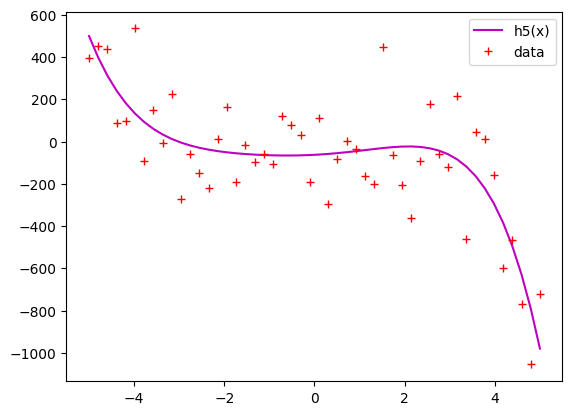

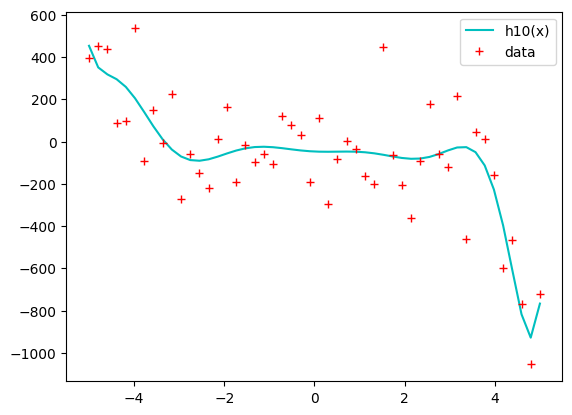

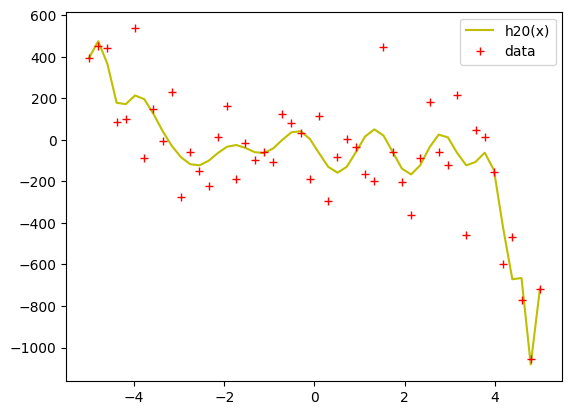

In [14]:
# Vaš kôd ovdje

color = "gbmcy"

plt.plot(X, y, 'r+', label='data')
for idx, d in enumerate([1, 3, 5, 10, 20]):
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X)
    w = linalg.pinv(FI).dot(y).reshape(-1)  
    h_x = w.dot(FI.transpose())

    label = f"h{d}(x)"
    
    print(f"Srednja kvadratna pogreška za {label}: {mean_squared_error(y, h_x)}")
    plt.plot(X, h_x, color[idx], label=label)
plt.legend(loc="best")

for idx, d in enumerate([1, 3, 5, 10, 20]):
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X)
    w = linalg.pinv(FI).dot(y).reshape(-1)  
    h_x = w.dot(FI.transpose())

    label = f"h{d}(x)"
    
    plt.figure()
    plt.plot(X, h_x, color[idx], label=label)
    plt.plot(X, y, 'r+', label='data')
    plt.legend(loc="best")

plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

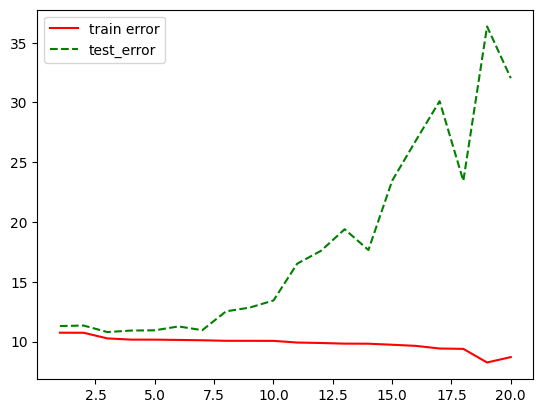

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

complexity = np.arange(1, 21, dtype=int)
train_error = np.zeros(20)
test_error = np.zeros(20)

for idx, d in enumerate(complexity):
    poly = PolynomialFeatures(d)
    
    FI_train = poly.fit_transform(X_train)
    FI_test = poly.fit_transform(X_test)
    
    w = linalg.pinv(FI_train).dot(y_train).reshape(-1)
    
    h_x_train = w.dot(FI_train.transpose())
    h_x_test = w.dot(FI_test.transpose())

    train_error[idx] = np.log(mean_squared_error(y_train, h_x_train))
    test_error[idx] = np.log(mean_squared_error(y_test, h_x_test))
    
plt.plot(complexity, train_error, 'r', label="train error")
plt.plot(complexity, test_error, 'g--', label="test_error")
plt.legend(loc="best")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

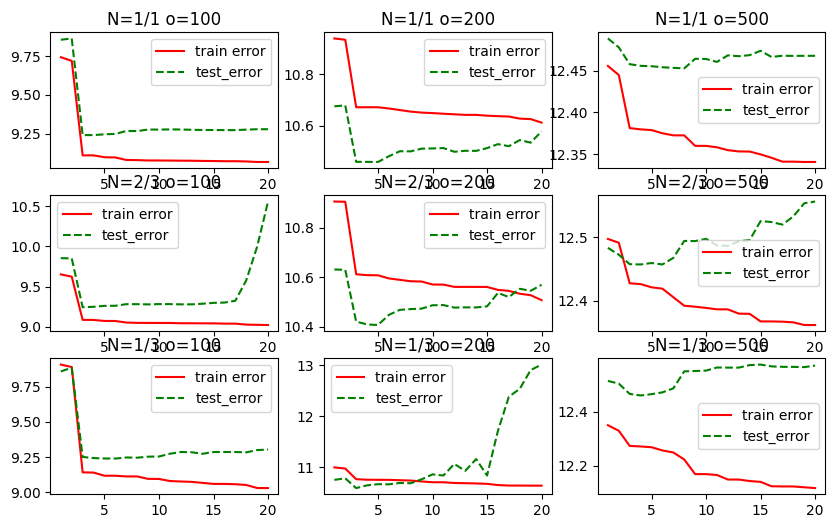

In [16]:
# Vaš kôd ovdje
def complexity_plot(X_train, X_test, y_train, y_test):
    complexity = np.arange(1, 21, dtype=int)
    train_error = np.zeros(20)
    test_error = np.zeros(20)
    
    for idx, d in enumerate(complexity):
        poly = PolynomialFeatures(d)
        
        FI_train = poly.fit_transform(X_train)
        FI_test = poly.fit_transform(X_test)
        
        w = linalg.pinv(FI_train).dot(y_train).reshape(-1)
        
        h_x_train = w.dot(FI_train.transpose())
        h_x_test = w.dot(FI_test.transpose())
    
        train_error[idx] = np.log(mean_squared_error(y_train, h_x_train))
        test_error[idx] = np.log(mean_squared_error(y_test, h_x_test))
    
    plt.plot(complexity, train_error, 'r', label="train error")
    plt.plot(complexity, test_error, 'g--', label="test_error")
    plt.legend(loc="best")


data = make_instances(-5, 5, 1000)

X_train, X_test = train_test_split(data, test_size=0.5)

Y_train_100_1 = make_labels(X_train, f, 100)
Y_train_200_1 = make_labels(X_train, f, 200)
Y_train_500_1 = make_labels(X_train, f, 500)

Y_test_100_1 = make_labels(X_test, f, 100)
Y_test_200_1 = make_labels(X_test, f, 200)
Y_test_500_1 = make_labels(X_test, f, 500)

X_train_100_2, X_train_100_3, Y_train_100_2, Y_train_100_3 = train_test_split(X_train, Y_train_100_1, test_size=0.33)
X_train_200_2, X_train_200_3, Y_train_200_2, Y_train_200_3 = train_test_split(X_train, Y_train_200_1, test_size=0.33)
X_train_500_2, X_train_500_3, Y_train_500_2, Y_train_500_3 = train_test_split(X_train, Y_train_500_1, test_size=0.33)

X_test_100_2, X_test_100_3, Y_test_100_2, Y_test_100_3 = train_test_split(X_test, Y_test_100_1, test_size=0.33)
X_test_200_2, X_test_200_3, Y_test_200_2, Y_test_200_3 = train_test_split(X_test, Y_test_200_1, test_size=0.33)
X_test_500_2, X_test_500_3, Y_test_500_2, Y_test_500_3 = train_test_split(X_test, Y_test_500_1, test_size=0.33)

plt.figure(figsize=(10,6))

plt.subplot(3, 3, 1)
plt.title("N=1/1 o=100")
complexity_plot(X_train, X_test, Y_train_100_1, Y_test_100_1)

plt.subplot(3, 3, 2)
plt.title("N=1/1 o=200")
complexity_plot(X_train, X_test, Y_train_200_1, Y_test_200_1)

plt.subplot(3, 3, 3)
plt.title("N=1/1 o=500")
complexity_plot(X_train, X_test, Y_train_500_1, Y_test_500_1)

plt.subplot(3, 3, 4)
plt.title("N=2/3 o=100")
complexity_plot(X_train_100_2, X_test_100_2, Y_train_100_2, Y_test_100_2)

plt.subplot(3, 3, 5)
plt.title("N=2/3 o=200")
complexity_plot(X_train_200_2, X_test_200_2, Y_train_200_2, Y_test_200_2)

plt.subplot(3, 3, 6)
plt.title("N=2/3 o=500")
complexity_plot(X_train_500_2, X_test_500_2, Y_train_500_2, Y_test_500_2)

plt.subplot(3, 3, 7)
plt.title("N=1/3 o=100")
complexity_plot(X_train_100_3, X_test_100_3, Y_train_100_3, Y_test_100_3)

plt.subplot(3, 3, 8)
plt.title("N=1/3 o=200")
complexity_plot(X_train_200_3, X_test_200_3, Y_train_200_3, Y_test_200_3)

plt.subplot(3, 3, 9)
plt.title("N=1/3 o=500")
complexity_plot(X_train_500_3, X_test_500_3, Y_train_500_3, Y_test_500_3)

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

labmda=0, w:
 [ 4.         -5.91666667  3.375      -0.45833333]
labmda=1, w:
 [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
labmda=10, w:
 [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
error:  1.5301239155732508e-25
error:  0.6217320437472029
error:  1.0005935479772292


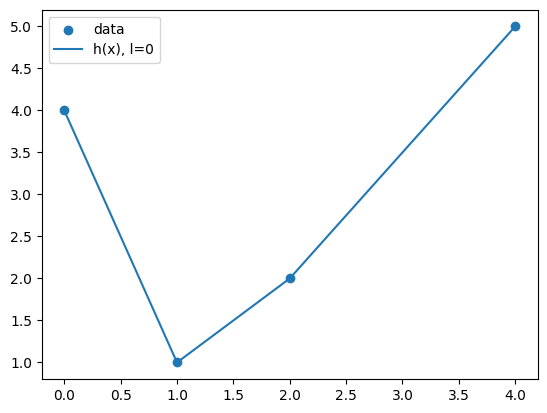

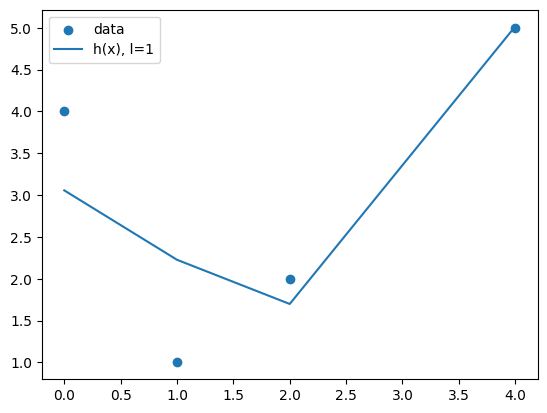

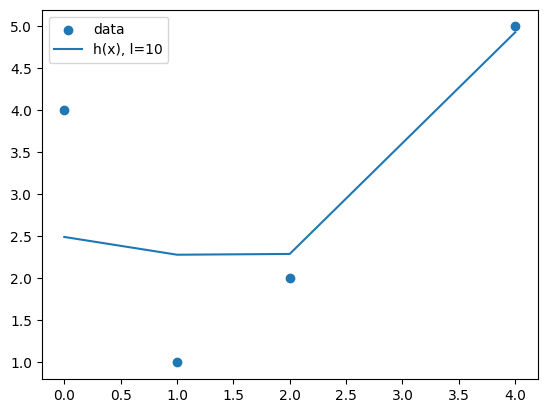

In [17]:
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)
FI

I = np.identity(FI.shape[1])
I[0][0] = 0

lm = 0
w_0 = linalg.inv(FI.transpose().dot(FI) + lm*I).dot(FI.transpose()).dot(y)

lm = 1
w_1 = linalg.inv(FI.transpose().dot(FI) + lm*I).dot(FI.transpose()).dot(y)

lm = 10
w_10 = linalg.inv(FI.transpose().dot(FI) + lm*I).dot(FI.transpose()).dot(y)

print("labmda=0, w:\n", w_0)
print("labmda=1, w:\n", w_1)
print("labmda=10, w:\n", w_10)

h_x_0 = w_0.dot(FI.transpose())
h_x_1 = w_1.dot(FI.transpose())
h_x_10 = w_10.dot(FI.transpose())

print("error: ", mean_squared_error(y, h_x_0))
print("error: ", mean_squared_error(y, h_x_1))
print("error: ", mean_squared_error(y, h_x_10))

plt.figure()
plt.scatter(X, y, label="data")
plt.plot(X, h_x_0, label="h(x), l=0")
plt.legend(loc="best")

plt.figure()
plt.scatter(X, y, label="data")
plt.plot(X, h_x_1, label="h(x), l=1")
plt.legend(loc="best")

plt.figure()
plt.scatter(X, y, label="data")
plt.plot(X, h_x_10, label="h(x), l=10")
plt.legend(loc="best")

plt.show()

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

labmda=0, w:
 [ 0.         -5.91666667  3.375      -0.45833333] 4.000000000000034
error:  3.6371418111346276e-28
labmda=1, w:
 [ 0.         -0.69079365 -0.2831746   0.1445805 ] 3.0569614512471652
error:  0.621732043747204
labmda=10, w:
 [ 0.         -0.15897295 -0.13423067  0.0815601 ] 2.4944418431229725
error:  1.0005935479772319


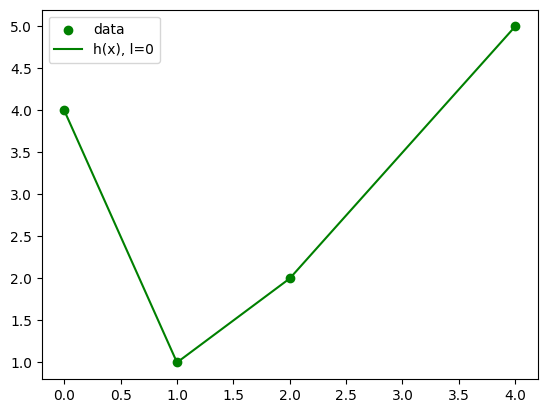

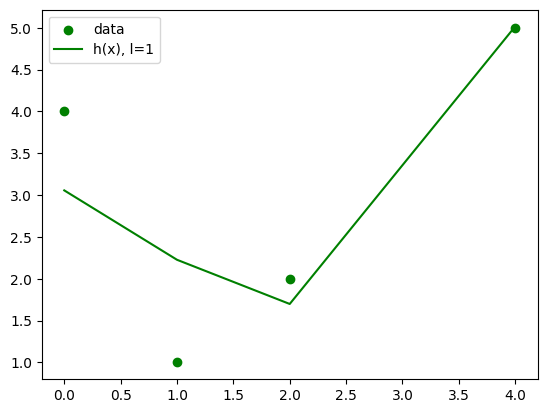

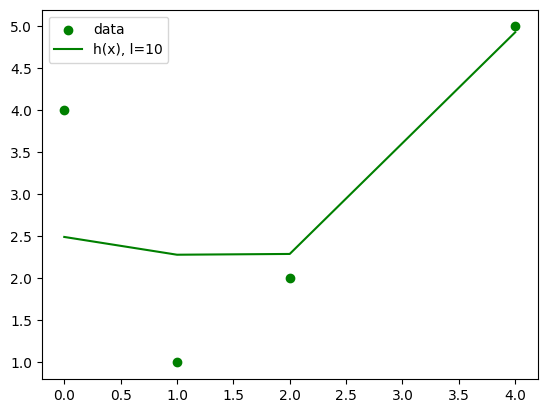

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)

clf = Ridge(alpha=0)
clf.fit(FI, y)
print("labmda=0, w:\n", clf.coef_, clf.intercept_)
print("error: ", mean_squared_error(y, clf.predict(FI)))

plt.figure()
plt.scatter(X, y, c="g", label="data")
plt.plot(X, clf.predict(FI), "g", label="h(x), l=0")
plt.legend(loc="best")

clf = Ridge(alpha=1)
clf.fit(FI, y)
print("labmda=1, w:\n", clf.coef_, clf.intercept_)
print("error: ", mean_squared_error(y, clf.predict(FI)))

plt.figure()
plt.scatter(X, y, c="g", label="data")
plt.plot(X, clf.predict(FI), "g", label="h(x), l=1")
plt.legend(loc="best")

clf = Ridge(alpha=10)
clf.fit(FI, y)
print("labmda=10, w:\n", clf.coef_, clf.intercept_)
print("error: ", mean_squared_error(y, clf.predict(FI)))

plt.figure()
plt.scatter(X, y, c="g", label="data")
plt.plot(X, clf.predict(FI), "g", label="h(x), l=10")
plt.legend(loc="best")


plt.show()

### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

lm=0, d=2  error:  60292.55907639475
lm=0, d=10  error:  48037.31111524827
lm=100, d=2  error:  62346.237080556166
lm=100, d=10  error:  48868.11846790945


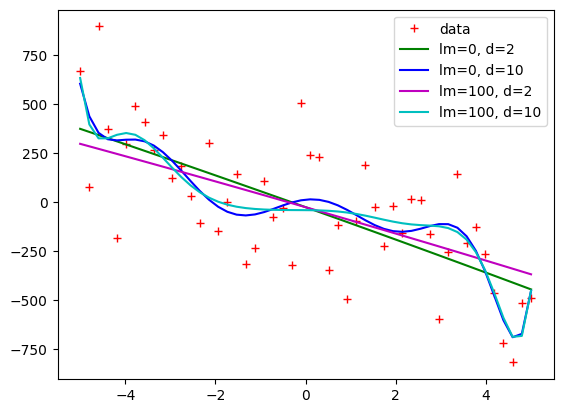

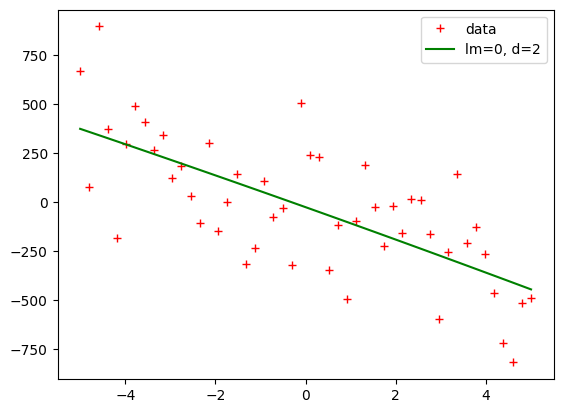

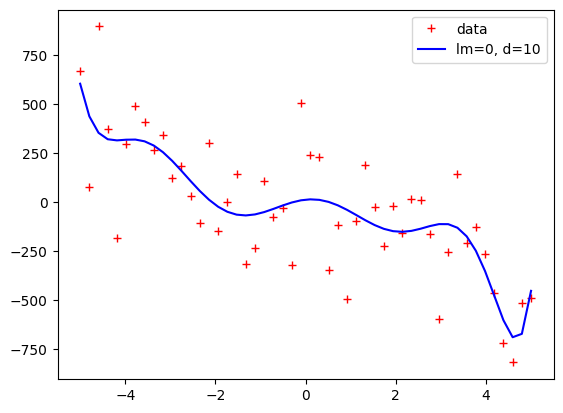

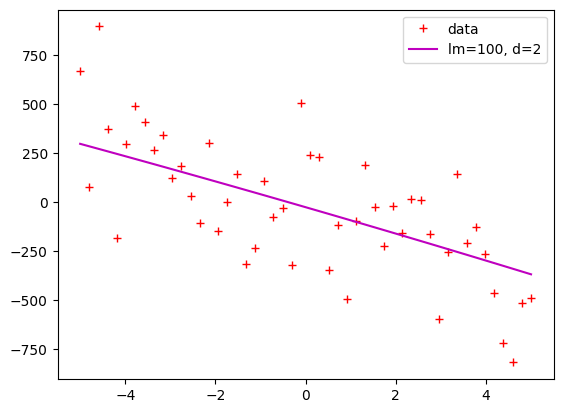

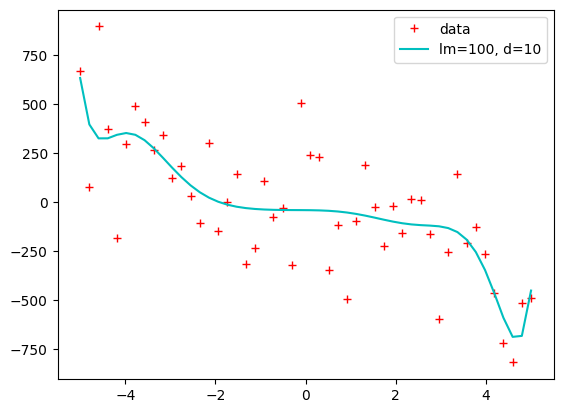

In [19]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

H = [(0, 2, 'g'), (0, 10, 'b'), (100, 2, 'm'), (100, 10, 'c')]

plt.plot(X, y, 'r+', label='data')

for lm, d, c in H:
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X)

    clf = Ridge(alpha=lm)
    clf.fit(FI, y)

    label = f"lm={lm}, d={d}"

    print(label, " error: ", mean_squared_error(y, clf.predict(FI)))
    plt.plot(X, clf.predict(FI), c, label=label)

plt.legend(loc="best")

for lm, d, c in H:
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X)

    clf = Ridge(alpha=lm)
    clf.fit(FI, y)

    label = f"lm={lm}, d={d}"

    plt.figure()
    plt.plot(X, y, 'r+', label='data')
    plt.plot(X, clf.predict(FI), c, label=label)
    plt.legend(loc="best")

plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


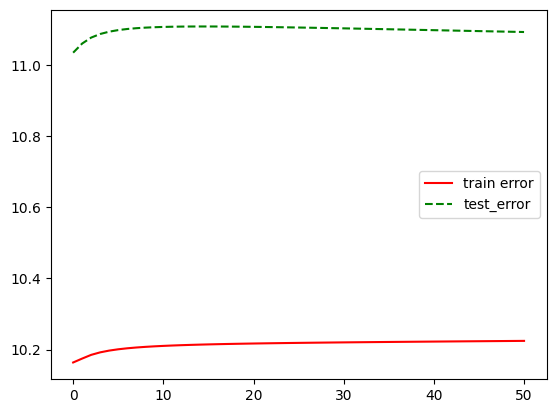

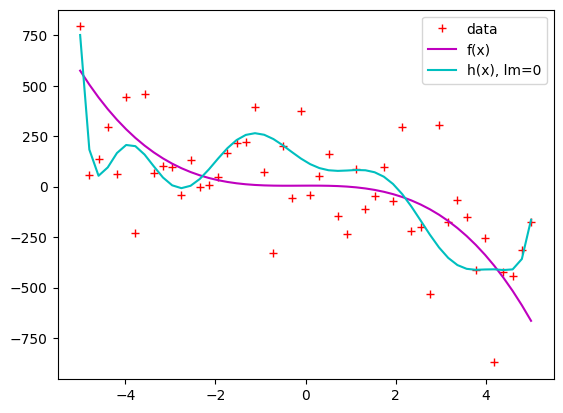

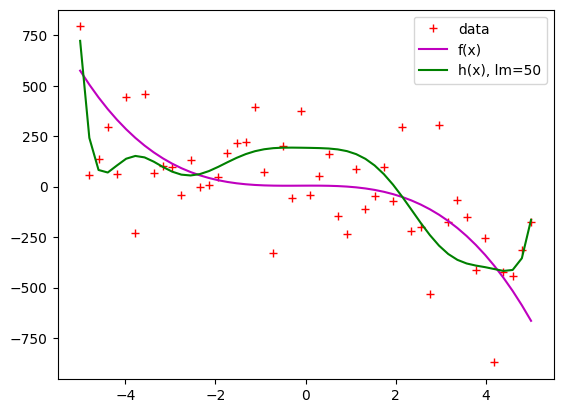

In [20]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

poly = PolynomialFeatures(10)
    
FI_train = poly.fit_transform(X_train)
FI_test = poly.fit_transform(X_test)

train_error = np.zeros(51)
test_error = np.zeros(51)

for idx, lm in enumerate(range(51)): 
    clf = Ridge(alpha=lm)
    clf.fit(FI_train, y_train)
    
    h_x_train = clf.predict(FI_train)
    h_x_test = clf.predict(FI_test)

    train_error[idx] = np.log(mean_squared_error(y_train, h_x_train))
    test_error[idx] = np.log(mean_squared_error(y_test, h_x_test))
    
plt.plot(train_error, 'r', label="train error")
plt.plot(test_error, 'g--', label="test_error")
plt.legend(loc="best")


clf = Ridge(alpha=0)
clf.fit(FI_train, y_train)

plt.figure()
plt.plot(X, y, 'r+', label='data')
plt.plot(X, f(X), 'm', label='f(x)')
plt.plot(X, clf.predict(poly.fit_transform(X)), 'c', label="h(x), lm=0")
plt.legend(loc="best")

clf = Ridge(alpha=50)
clf.fit(FI_train, y_train)

plt.figure()
plt.plot(X, y, 'r+', label='data')
plt.plot(X, f(X), 'm', label='f(x)')
plt.plot(X, clf.predict(poly.fit_transform(X)), 'g', label="h(x), lm=50")
plt.legend(loc="best")

plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

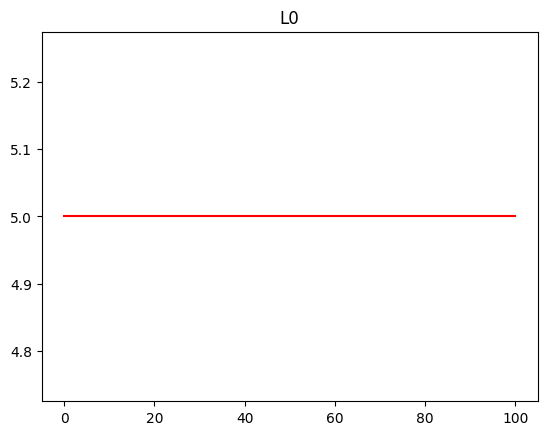

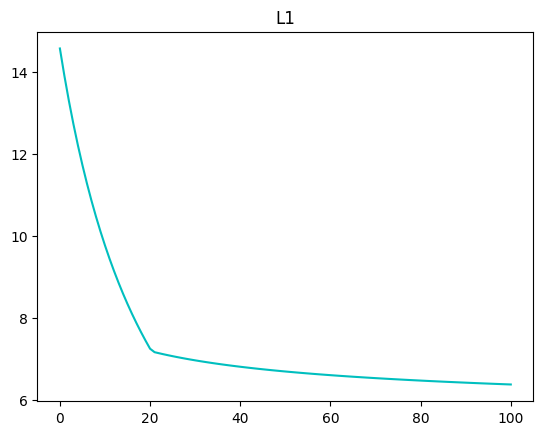

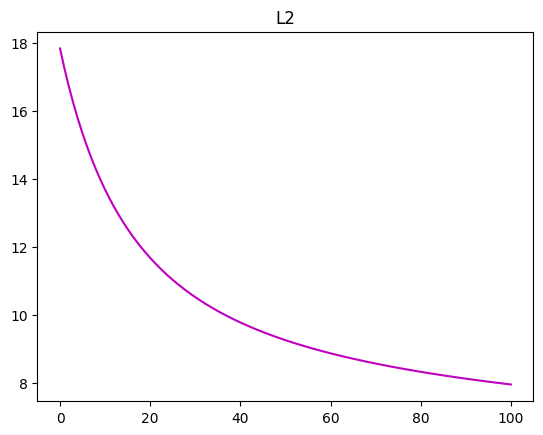

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

poly = PolynomialFeatures(5)
FI = poly.fit_transform(X)

weights = []

for lm in range(101):
    clf = Ridge(alpha=lm)
    clf.fit(FI, y)
    weights.append(clf.coef_)

plt.figure()
plt.plot([nonzeroes(w.reshape(-1)) for w in weights], 'r', label="L0")
plt.title("L0")

plt.figure()
plt.plot([linalg.norm(w, 1) for w in weights], 'c')
plt.title("L1")

plt.figure()
plt.plot([linalg.norm(w, 2) for w in weights], 'm', label="L2")
plt.title("L2")

plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/home/marko/Workspace/FER/2023-24/SU1/lab/lab_env/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/marko/Workspace/FER/2023-24/SU1/lab/lab_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marko/Workspace/FER/2023-24/SU1/lab/lab_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+06, tolerance: 6.522e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using on

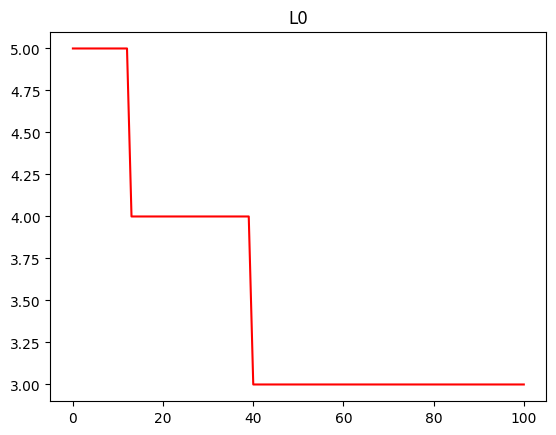

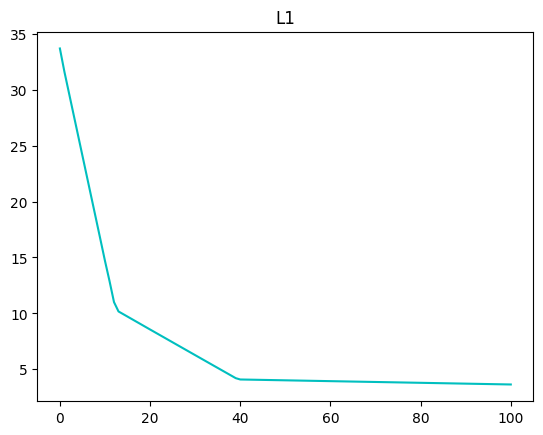

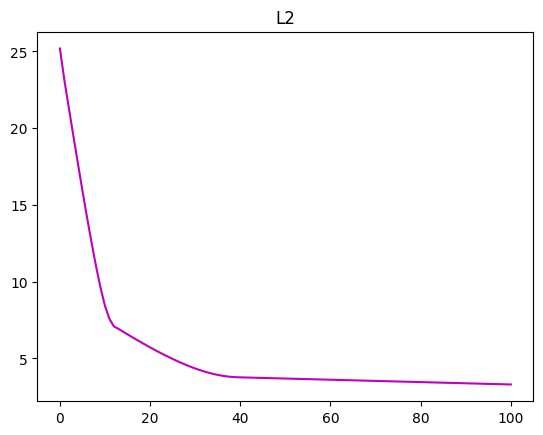

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

poly = PolynomialFeatures(5)
FI = poly.fit_transform(X)

weights = []

for lm in range(101):
    clf = Lasso(alpha=lm)
    clf.fit(FI, y)
    weights.append(clf.coef_)

plt.figure()
plt.plot([nonzeroes(w.reshape(-1)) for w in weights], 'r', label="L0")
plt.title("L0")

plt.figure()
plt.plot([linalg.norm(w, 1) for w in weights], 'c')
plt.title("L1")

plt.figure()
plt.plot([linalg.norm(w, 2) for w in weights], 'm', label="L2")
plt.title("L2")

plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

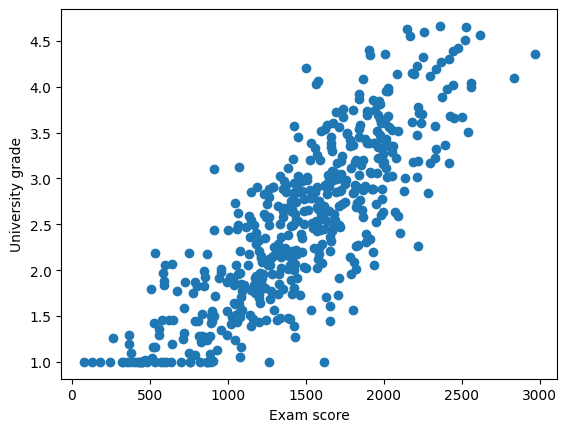

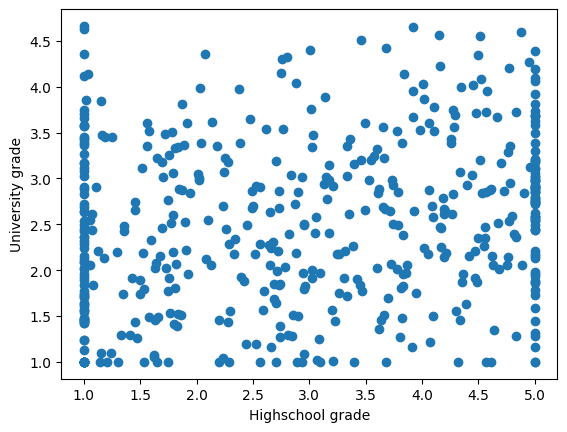

In [32]:
# Vaš kôd ovdje
plt.figure()
plt.scatter(exam_score, grades_y)
plt.ylabel("University grade")
plt.xlabel("Exam score")

plt.figure()
plt.scatter(grade_in_highschool, grades_y)
plt.ylabel("University grade")
plt.xlabel("Highschool grade")

plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [57]:
# Vaš kôd ovdje

clf = Ridge(alpha=0.01)
clf.fit(grades_X, grades_y)

print("Error:", mean_squared_error(clf.predict(grades_X), grades_y))
print(clf.coef_, clf.intercept_)

Error: 0.23990435033172805
[0.00141497 0.09477276] 0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [58]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)

scaler.fit(grades_y.reshape(-1, 1))
grades_y_fixed = scaler.transform(grades_y.reshape(-1, 1))

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed, grades_y_fixed)

print("Error:", mean_squared_error(clf.predict(grades_X_fixed), grades_y_fixed))
print(clf.coef_, clf.intercept_)

Error: 0.29228757017069595
[[0.81630375 0.15167761]] [8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [62]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.c_[grades_X_fixed, grades_X_fixed[:, 1]]

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [63]:
# Vaš kôd ovdje

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)

print("Error:", mean_squared_error(clf.predict(grades_X_fixed_colinear), grades_y_fixed))
print(clf.coef_, clf.intercept_)

Error: 0.2922875701674416
[[0.81630364 0.07583957 0.07583957]] [8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [68]:
# Vaš kôd ovdje
w_1 = []
w_1000 = []

for k in range(10):
    X_1, X_1000, y_1, y_1000 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)

    clf = Ridge(alpha=0.01)
    clf.fit(X_1, y_1)
    print(f"k={k}\tlambda=0.01:", clf.coef_)
    w_1.append(clf.coef_)
    
    clf = Ridge(alpha=1000)
    clf.fit(X_1000, y_1000)
    print(f"\tlambda=1000:", clf.coef_, "\n")
    w_1000.append(clf.coef_)

print("stdev lambda=0.01:", np.std(w_1, axis=0))
print("stdev lambda=1000:", np.std(w_1000, axis=0))

k=0	lambda=0.01: [[0.84439109 0.08119926 0.08119926]]
	lambda=1000: [[0.16424437 0.03440521 0.03440521]] 

k=1	lambda=0.01: [[0.77278502 0.06294473 0.06294473]]
	lambda=1000: [[0.17062716 0.03315458 0.03315458]] 

k=2	lambda=0.01: [[0.80837352 0.09078395 0.09078395]]
	lambda=1000: [[0.16722769 0.0242736  0.0242736 ]] 

k=3	lambda=0.01: [[0.83308989 0.07218983 0.07218983]]
	lambda=1000: [[0.16423851 0.02685663 0.02685663]] 

k=4	lambda=0.01: [[0.77407599 0.10592944 0.10592944]]
	lambda=1000: [[0.15210361 0.01863094 0.01863094]] 

k=5	lambda=0.01: [[0.83232356 0.0609517  0.0609517 ]]
	lambda=1000: [[0.16307304 0.04651042 0.04651042]] 

k=6	lambda=0.01: [[0.81982006 0.06540364 0.06540364]]
	lambda=1000: [[0.155506  0.0331135 0.0331135]] 

k=7	lambda=0.01: [[0.83461472 0.08478848 0.08478848]]
	lambda=1000: [[0.14061222 0.0329342  0.0329342 ]] 

k=8	lambda=0.01: [[0.75822669 0.0914498  0.0914498 ]]
	lambda=1000: [[0.16562706 0.02673694 0.02673694]] 

k=9	lambda=0.01: [[0.83377304 0.07762818

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.